In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [10]:
dataframe = pd.read_csv("Zomato data .csv")



In [11]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


Let's convert the datatype of the "rate" column to float and remove the denominator.

In [14]:
def handleRate (value):
    value = str(value).split('/')
    value=value[0];
    return float(value)

dataframe ['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [16]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Conclusion 
There is no null value in dataframe

TYPE OF RESTAURANT

Text(0.5, 0, 'Type of Restaurant')

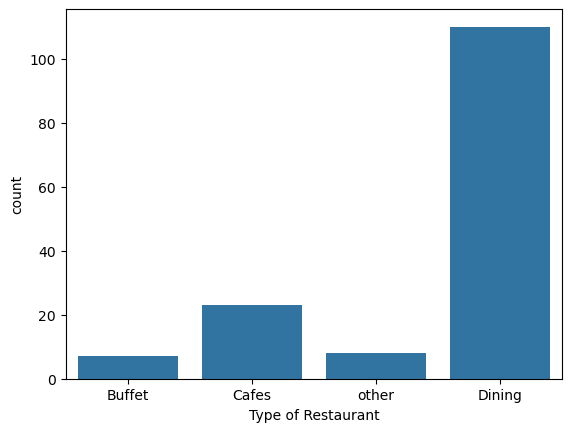

In [17]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of Restaurant")

Conclusion 
The majority of the Restaurant falls into the dining category.

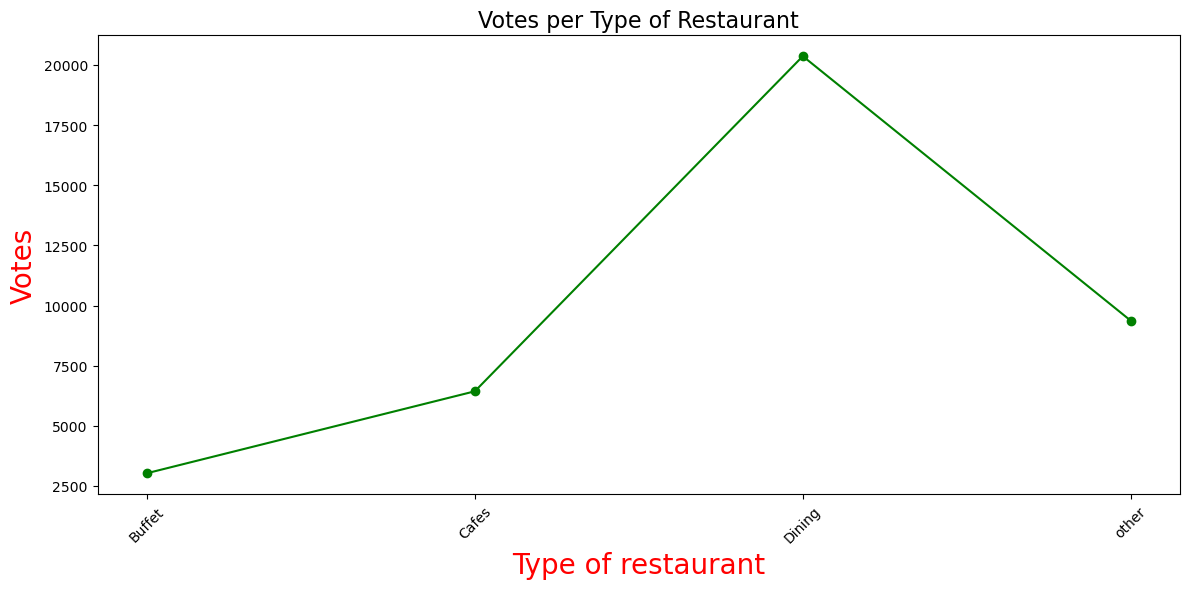

In [23]:


# Assuming 'dataframe' is already loaded
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()

# Reset index to turn grouped data into a proper DataFrame
result = pd.DataFrame({'Type of restaurant': grouped_data.index, 'Votes': grouped_data.values})

# Plot
plt.figure(figsize=(12,6))
plt.plot(result['Type of restaurant'], result['Votes'], color="green", marker="o")
plt.xlabel("Type of restaurant", color="red", fontsize=20)
plt.ylabel("Votes", color="red", fontsize=20)
plt.xticks(rotation=45)
plt.title("Votes per Type of Restaurant", fontsize=16)
plt.tight_layout()
plt.show()

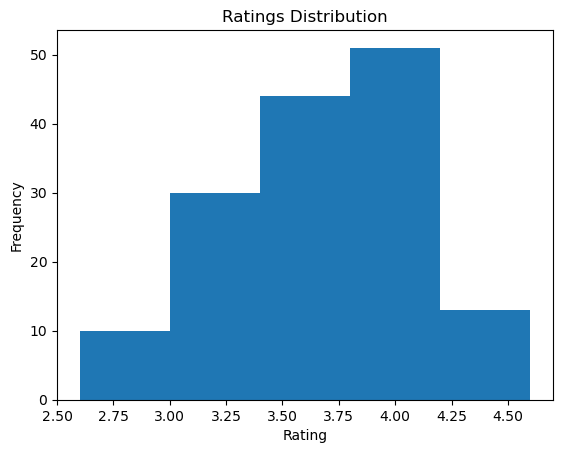

In [26]:

plt.hist(dataframe['rate'], bins=5)
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

Conclusion
Mjority of restaurant received ratings ranging from 3.5 to 4

The majority couples prefer restaurant with an approximate cost of 300 rupees.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

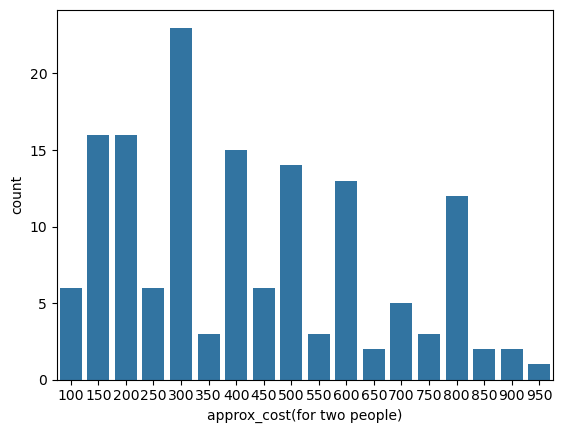

In [29]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

whether online order receive higher ratings than offline orders.

<Axes: xlabel='online_order', ylabel='rate'>

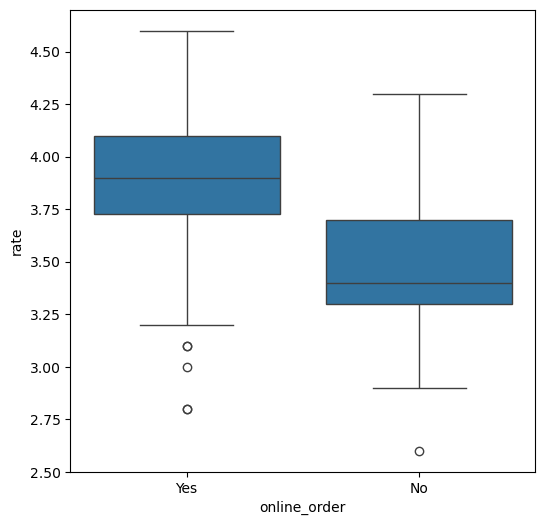

In [30]:
plt.figure(figsize=(6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

Offline Order receive lower ratings in comparision of Online Order,which obtained excellent rating.

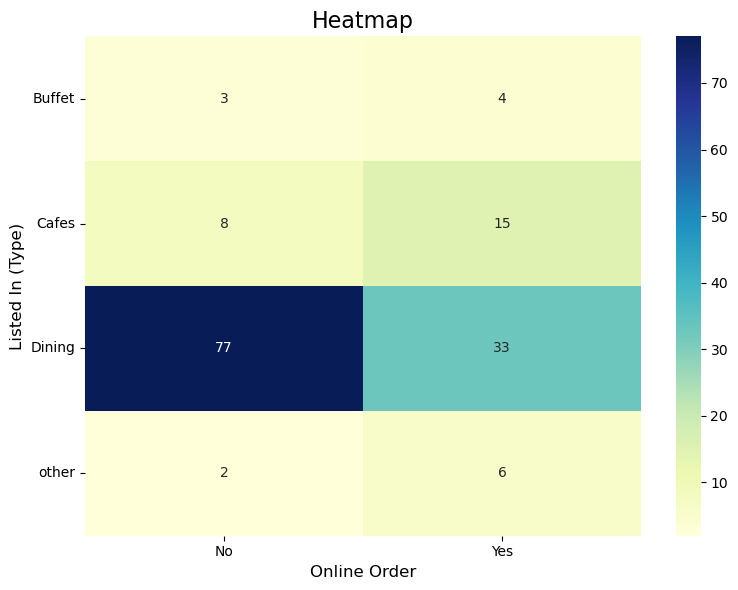

In [31]:

pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap", fontsize=16)
plt.xlabel("Online Order", fontsize=12)
plt.ylabel("Listed In (Type)", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Dining restraunts primarily accepts offline orders, whereas cafes receive online orders. This suggest that clients prefer to place order in person at restrants , but prefering online orders in cafes.